TUGAS 1

In [58]:
'''IMPORT LIBRARY'''
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import missingno as msno

In [59]:
'''IMPORT DATA .LAS'''
las1 = lasio.read(r'PLOT MISSING VALUE.las')

'''DEFINE DATA FRAME'''
df1 = las1.df()
print(df1.columns.values)

['ECGR' 'ATRX' 'ATRT' 'NPHI' 'CAL1' 'HDAR' 'HROM' 'DTSM' 'DTCO']


In [60]:
'''PRINT DATA FRAME'''
df1.head(1000)

,ECGR,ATRX,ATRT,NPHI,CAL1,HDAR,HROM,DTSM,DTCO
DEPT,,,,,,,,,
579.5,NaN,0.6000,0.6700,NaN,NaN,NaN,NaN,NaN,NaN
580.0,NaN,0.6700,0.7000,NaN,NaN,NaN,NaN,NaN,NaN
580.5,NaN,0.6200,0.6700,NaN,NaN,NaN,NaN,NaN,NaN
581.0,NaN,0.5500,0.6400,NaN,NaN,NaN,NaN,NaN,NaN
581.5,NaN,0.5598,0.6295,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1077.0,14.9179,0.9696,0.7300,NaN,NaN,NaN,NaN,NaN,NaN
1077.5,10.9996,0.9895,0.7592,NaN,NaN,NaN,NaN,NaN,NaN
1078.0,12.1125,0.9700,0.7800,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
'''REPLACE MISSING VALUE'''
df1_dropNaN = df1.dropna()
df1_dropNaN.head(1000)

,ECGR,ATRX,ATRT,NPHI,CAL1,HDAR,HROM,DTSM,DTCO
DEPT,,,,,,,,,
4557.0,34.4986,2.4200,2.3100,21.23,5.1223,6.2464,2.3115,131.5066,74.0847
4557.5,35.7732,2.3201,2.2102,22.68,5.1216,6.2423,2.2707,139.8558,73.9341
4558.0,38.3568,2.2992,2.1504,21.17,5.1223,6.2490,2.1994,141.8643,77.8736
4558.5,40.4549,2.5562,2.4235,20.78,5.1216,6.2548,2.2740,140.0904,79.0222
4567.5,35.4123,2.4119,2.3211,19.24,5.1223,6.2941,2.2208,127.5091,56.5047
...,...,...,...,...,...,...,...,...,...
4972.0,33.3808,0.3973,1.5806,3.60,5.8381,6.0883,2.5987,109.9335,72.6598
4972.5,26.2362,0.2871,1.8128,3.28,5.8389,6.0923,2.5005,106.3846,70.3970
4973.0,24.0062,0.6886,3.6100,2.38,5.8358,6.0905,2.4206,104.1512,68.4944


<Axes: >

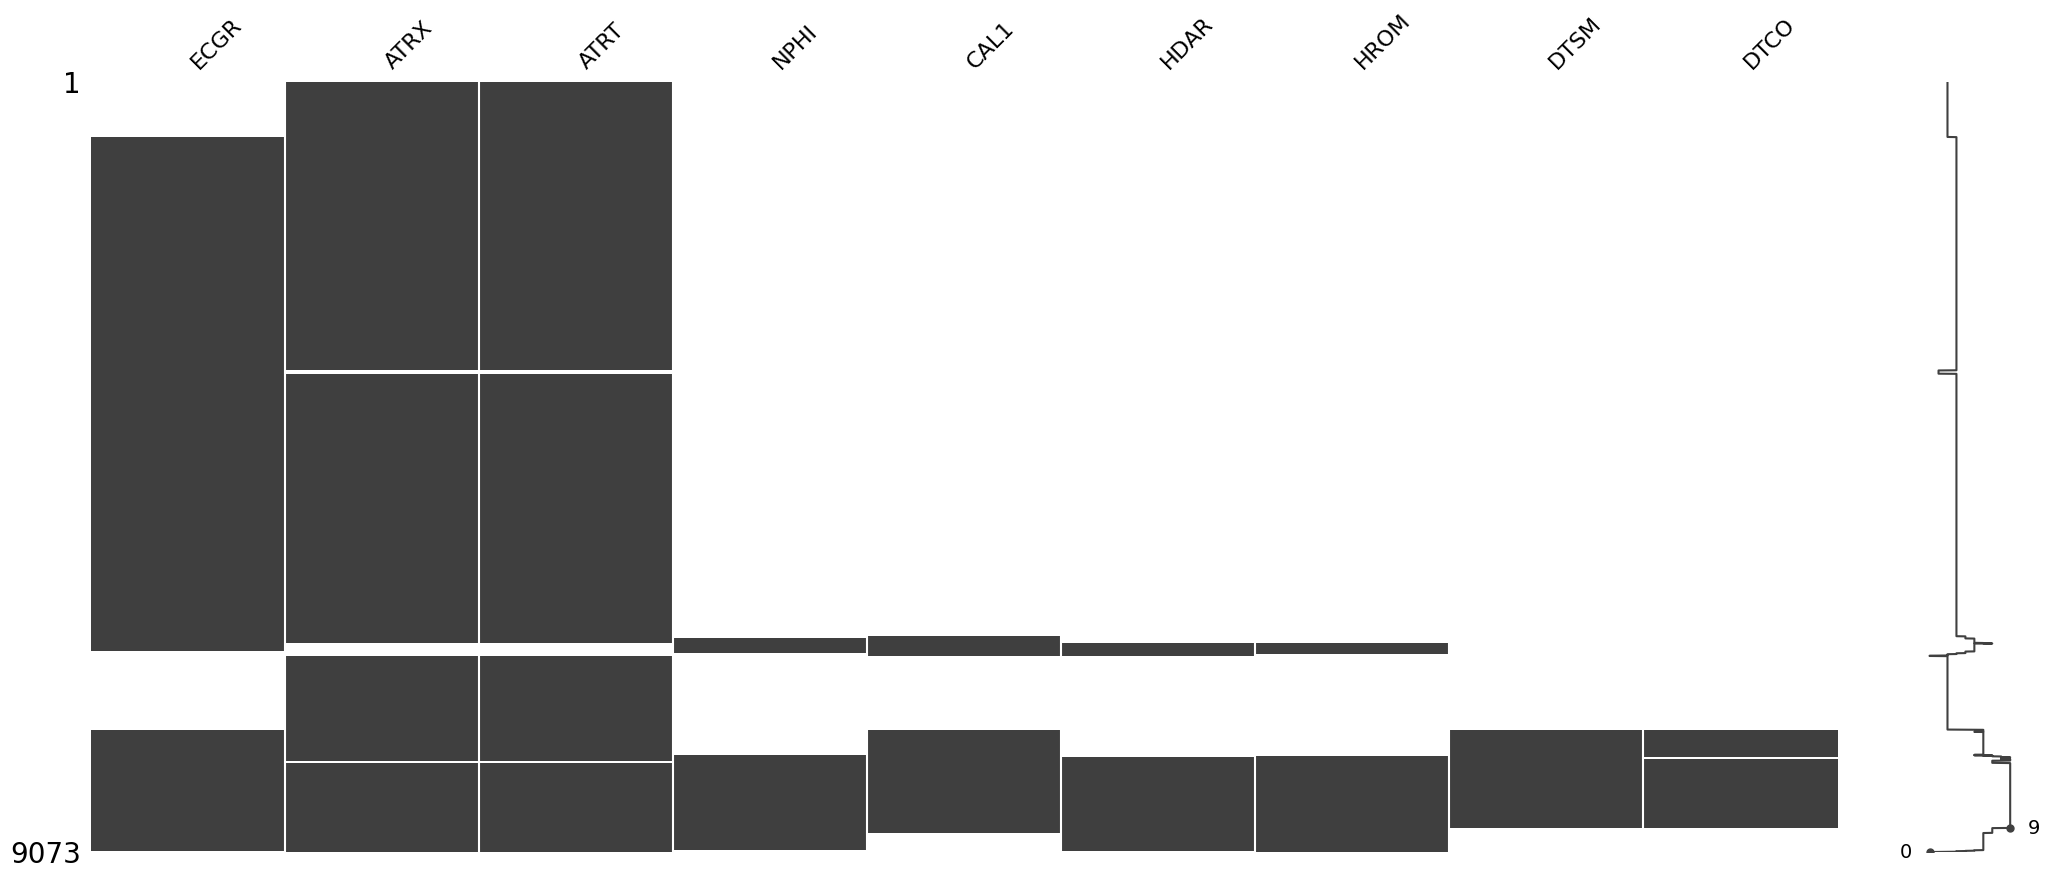

In [62]:
'''BAR PLOT MISSING VALUE'''
msno.matrix(df1)

<Axes: >

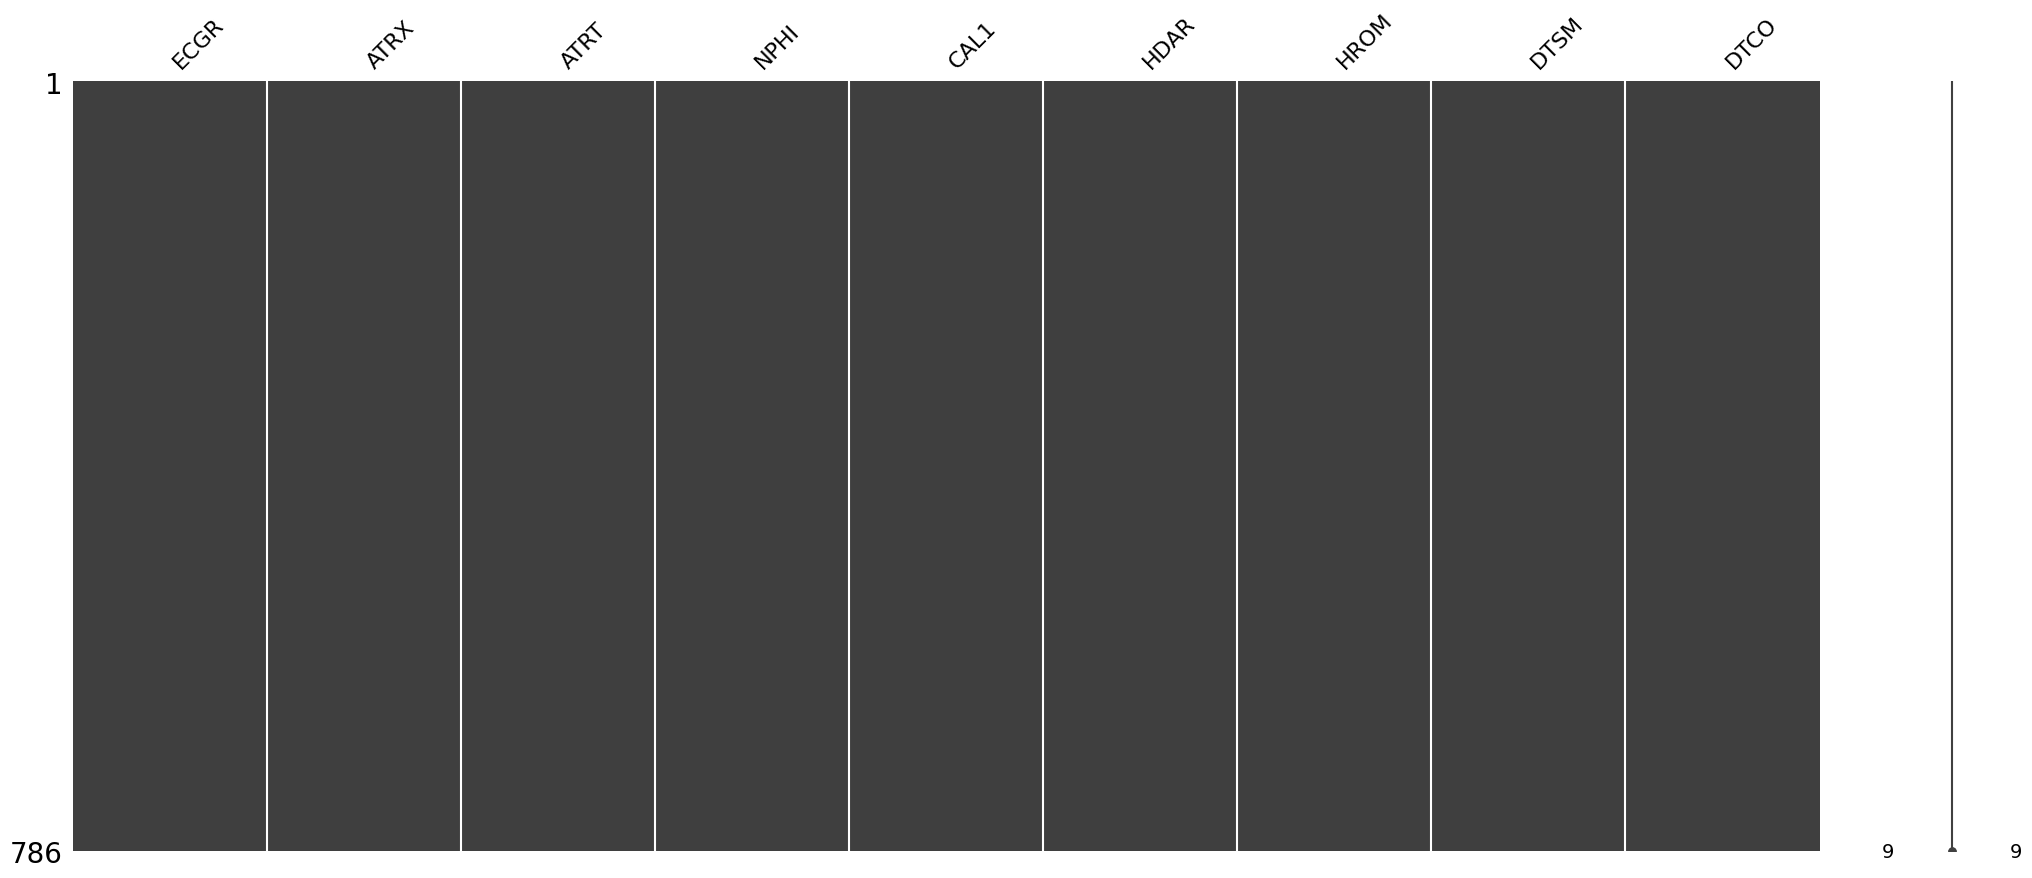

In [63]:
'''PLOT DATA WITHOUT NaN '''
msno.matrix(df1_dropNaN)

TUGAS 2

In [64]:
'''IMPORT DATA'''
# Simpan data well log dalam DataFrame
data = pd.read_excel("DATA COBA.xlsx")  # Ganti 'data_well_log.csv' dengan nama file Anda
dataframe = data[['DEPTH', 'GR', 'RHOB', 'NPHI', 'DTCO', 'DTSM', 'LITOLOGI']]  # Pindahkan kolom DEPTH ke posisi pertama
depth = dataframe['DEPTH']  # Kolom Depth untuk sumbu y

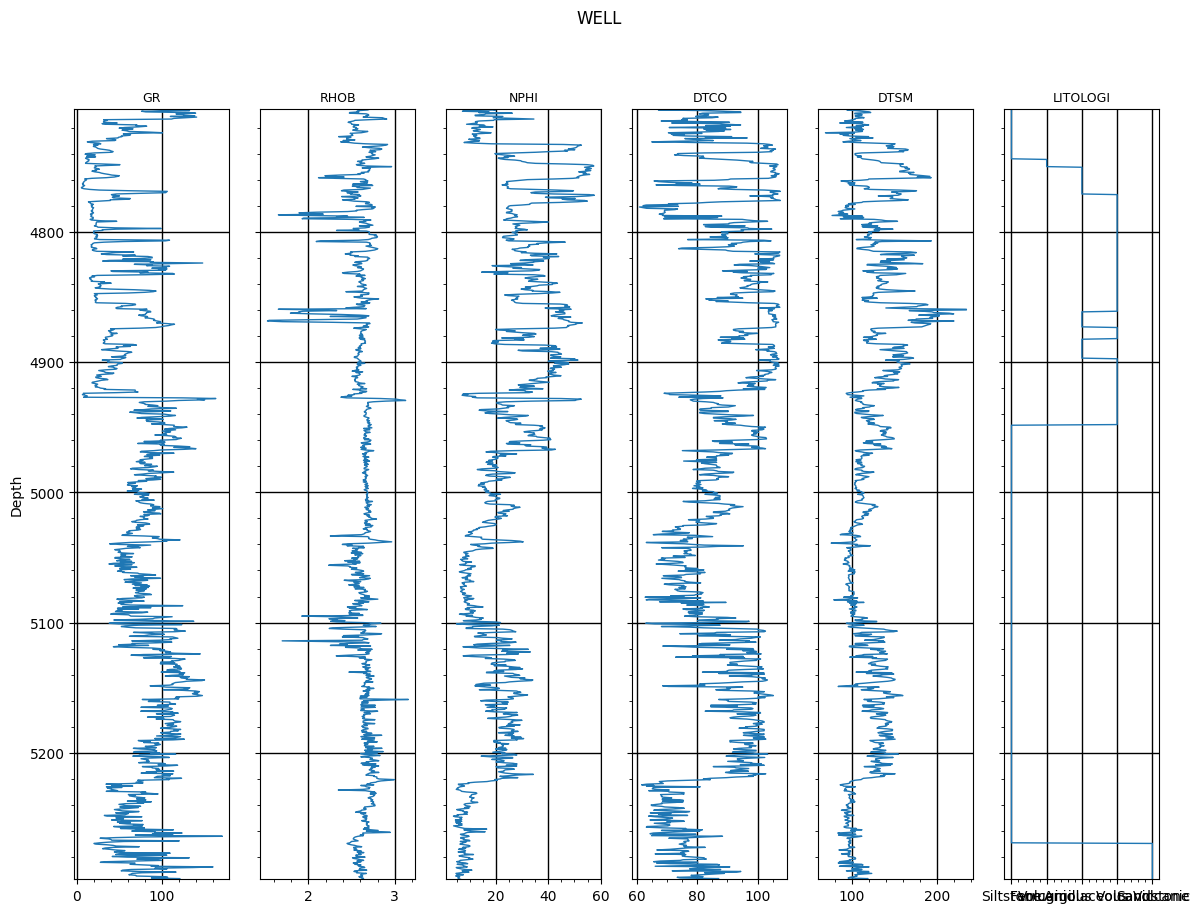

In [65]:
'''PLOTTING VARIABEL'''
fig, ax = plt.subplots(nrows=1, ncols=len(dataframe.columns) - 1, figsize=(14, 10), sharey=True)
fig.suptitle('WELL', fontsize=12)

select_mnemonics = dataframe.columns[1:]  # Mengambil kolom kecuali DEPTH

for i, col in enumerate(select_mnemonics):
    ax[i].plot(dataframe[col], depth, linewidth=1)
    ax[i].set_ylim(max(depth), min(depth))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle="-", linewidth="1", color="black")
    ax[i].set_title(f'{col}', fontsize=9)

# Mengubah label sumbu y menjadi "Depth"
ax[0].set_ylabel("Depth")

plt.show()

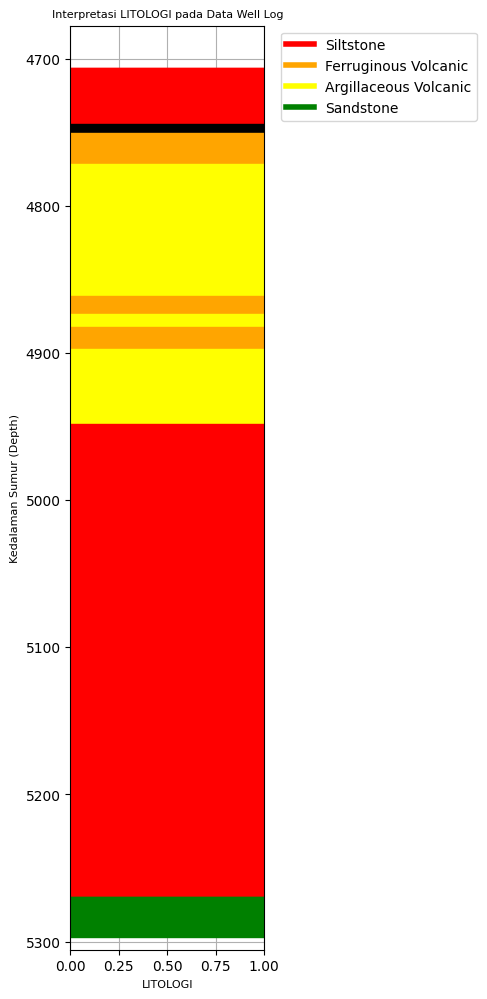

In [66]:
'''PLOTTING LITOLOGI'''
# Membuat kamus warna untuk setiap tipe formasi
color_map = {
    'Siltstone': 'RED',
    'Ferruginous Volcanic': 'ORANGE',
    'Argillaceous Volcanic': 'YELLOW',
    'Sandstone': 'green',
}

# Buat grafik
plt.figure(figsize=(2.5, 12))

# Loop melalui data kedalaman (depth) dan tipe formasi
for i, row in data.iterrows():
    depth = row['DEPTH']
    formation_type = row['LITOLOGI']  # Ganti dengan nama kolom yang sesuai

    # Tentukan warna berdasarkan tipe formasi
    color = color_map.get(formation_type, 'black')

    # Plot garis vertikal dengan warna yang sesuai
    plt.axhline(y=depth, color=color, linewidth=1)

# Atur label dan judul grafik
plt.xlabel('LITOLOGI', fontsize=8)
plt.ylabel('Kedalaman Sumur (Depth)', fontsize=8)
plt.title('Interpretasi LITOLOGI pada Data Well Log', fontsize=8)

# Tambahkan legenda untuk warna
legend_elements = [plt.Line2D([0], [0], color=color, lw=4, label=formation_type) for formation_type, color in color_map.items()]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan grafik
plt.gca().invert_yaxis()  # Balikkan sumbu y agar sesuai dengan kedalaman sumur sejati
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1183,) and (1,)

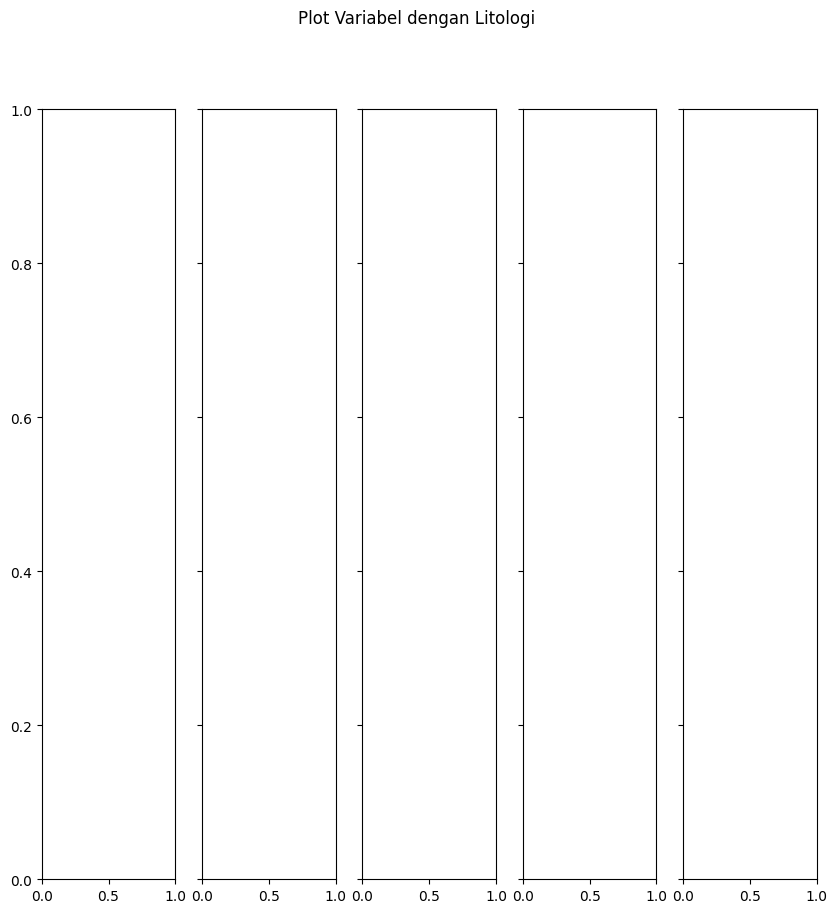

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=len(cols), figsize=(10, 10), sharey=True)
fig.suptitle('Plot Variabel dengan Litologi', fontsize=12)

select_mnemonics = cols

# Membuat kamus warna untuk setiap tipe formasi
color_map = {
    'Siltstone': 'red',
    'Ferruginous Volcanic': 'orange',
    'Argillaceous Volcanic': 'yellow',
    'Sandstone': 'green',
}

for i, col in enumerate(cols):
    ax[i].plot(dataframe[col], depth, linewidth=1, color='blue')
    ax[i].set_ylim(max(depth), min(depth))
    ax[i].minorticks_on()
    ax[i].grid(which='major', linestyle="-", linewidth="0.5", color="black")
    ax[i].set_title(f'{select_mnemonics[i]}', fontsize=7)
    
    for j in range(len(data)):
        formation_type = data.loc[j, 'LITOLOGI']
        color = color_map.get(formation_type, 'white')

        ax[i].axhspan(data.loc[j, 'DEPTH'], data.loc[j, 'DEPTH'] + 1, facecolor=color, alpha=0.5)

# Menambahkan legenda di subplot pertama (ax[0])
legend_handles = []
for formation_type, color in color_map.items():
    if formation_type not in legend_handles:
        legend_handles.append(mpatches.Patch(color=color, label=formation_type))
ax[0].legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax[0].set_ylabel("Depth")

plt.show()